In [252]:
%load_ext autoreload
%autoreload 2
from utils import view_pydot
from tree_definitions import binomial_tree_prices_x
from tree_definitions import binomial_tree_prices_v

from brownian_stock_simulator import BrownianStockSimulator
from european_call_option import EuropeanCallOption

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Stochastic Models for Finance and Insurance (Take Home Exam) 

# Problem 1
Consider two step $(N = 2)$ binomial model with $u = 2$, $d = \frac{1}{2}$ and $X_Y (0) = 4$. 
- Find the price and the hedging portfolio for a contract with a payoff $V(2) = \mathcal{I}(X_Y(2) \neq 4)Y(2)$.
- Find $V (0), V (1, H), V (1, T )$ and for the hedge the corresponding
positions in the asset $X$, that is $(\Delta^X (0), \Delta^X(1, H)$ and $\Delta^X(1, T ))$

We use

- $X(1,H)=uX(0)$
- $X(1,T)=dX(0)$
- $X(2,TT)=uX(1,H)$
- $X(2,TH)=X(2,HT)=dX(1,H)=uX(1,T)$
- $X(2,TT)=dX(1,T)$

to get the prices of $X$ at times $1,2$. 

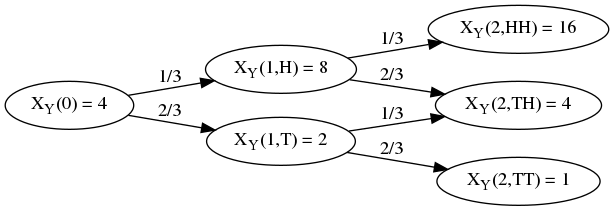

In [253]:
view_pydot(binomial_tree_prices_x)

We have,
$$
\begin{aligned}
    X_Y(0) &= u \cdot \mathbb{P}^Y(H) \cdot X_Y(0) + d \cdot (1-\mathbb{P}^Y(H)) \cdot X_Y(0) \\
    X_Y(0) &= u \cdot \mathbb{P}^Y(H) \cdot X_Y(0) + dX_Y(0) \cdot -d \cdot \mathbb{P}^Y(H) \cdot X_Y(0) \\
    1 &= \mathbb{P}^Y(H) \cdot (u-d) + d \\
    \mathbb{P}^Y(H) &= \frac{1-d}{u-d} \\
\end{aligned}
$$
and therefore in our case $$\mathbb{P}^Y(H)=\dfrac{1-1/2}{2-1/2}=\dfrac{2}{3}$$ and $$\mathbb{P}^Y(T)=1 - \mathbb{P}^Y(H) = \frac{1}{3}$$

To get the binomial tree for times $t = \{0,1\}$ for the contract with payoff $V(2) = \mathbb{1}(X_Y(2)\neq 4) \cdot Y(2)$, with $Y$ as the reference asset, we use the relationship:

$$V_Y(t) = V_Y(t+1,H)\cdot\mathbb{P}^Y(H) + V_Y(t+1,T) \cdot \mathbb{P}^Y(T)$$ and $$Y_X(t) = \frac{1}{X_Y(t)}$$

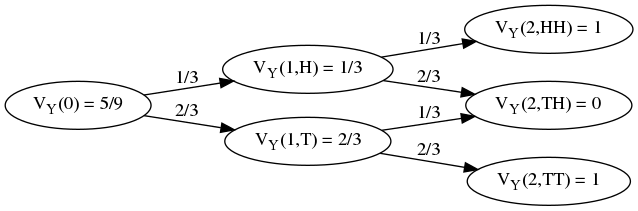

In [254]:
view_pydot(binomial_tree_prices_v)

Lastly we need the hedging positions $\Delta^X (0), \Delta^X(1, H)$ and $\Delta^X(1, T )$

$$
\begin{aligned}
    \Delta^X(0) &= \dfrac{V_Y(1,H) - V_Y(1,T)}{X_Y(1,H)-X_Y(1,T)} = \dfrac{1/3-2/3}{8-2} = \dfrac{-1}{18} \\
    \Delta^X(1,H) &= \dfrac{V_Y(2,HH) - V_Y(2,HT)}{X_Y(2,HH)-X_Y(2,HT)} = \dfrac{1-0}{16-4} = \dfrac{1}{12} \\
    \Delta^X(1,T) &= \dfrac{V_Y(2,TH) - V_Y(2,TT)}{X_Y(2,TH)-X_Y(2,TT)} = \dfrac{0-1}{4-1} = \dfrac{-1}{3}
\end{aligned}
$$

# Problem 2
Solve 
$$u_Y(t, x) = \mathbb{P}^Y[(L \leq X_Y(T) \leq U)| X_Y(t) = x]$$ for some $L < U$, where 

$$dX_Y(t) = \sigma X_Y(t) \cdot dW_Y(t)$$.

This corresponds to a contract $V$ with the payoff

$$V(T) = I(L \leq X_Y(T) \leq U) \cdot Y(T)$$

- Find the hedging portfolio for this contract (give both $\Delta_X(t)$ and $\Delta_Y(t))$
- Write down the partial equation for the function $u^Y$ and check that your solution satisfies this equation.

The event $\{L \leq X_Y(t) \leq U\}$ is equivalent to 
$$
\begin{alignat}{3}
    L &\leq X_Y(t) \cdot \exp\{\sigma[W_Y(T) − W_Y(t)]\} − \frac{1}{2} \sigma^2 (T − t)  & & \leq  U \\
    \log(\frac{L}{X_Y(t)}) &\leq \sigma[W_Y(T) − W_Y(t)]\} − \frac{1}{2} \sigma^2 (T − t) & & \leq \log(\frac{U}{X_Y(t)}) \\
    \dfrac{1}{\sigma{\sqrt{T-t}}} \cdot \log(\frac{L}{X_Y(t)}) + \frac{1}{2} \sigma (T − t) & \leq \dfrac{W_Y(T) − W_Y(t)}{\sqrt{T-t}} & & \leq \dfrac{1}{\sigma{\sqrt{T-t}}} \cdot \log(\frac{L}{X_Y(t)}) + \frac{1}{2} \sigma (T − t) \\
    \dfrac{1}{\sigma{\sqrt{T-t}}} \cdot \log(\frac{X_Y(t)}{U}) - \frac{1}{2} \sigma (T − t) & \leq -\dfrac{W_Y(T) − W_Y(t)}{\sqrt{T-t}} & & \leq \dfrac{1}{\sigma{\sqrt{T-t}}} \cdot \log(\frac{X_Y(t)}{L}) - \frac{1}{2} \sigma (T − t) \\
    d_-(U) & \leq  -\dfrac{W_Y(T) − W_Y(t)}{\sqrt{T-t}}  & & \leq  d_-(L)
\end{alignat}
$$

Since, $-\dfrac{W_Y(T) − W_Y(t)}{\sqrt{T-t}}$ is normally distributed with $0$ mean and unit variance, we have:

$$
\begin{aligned}
    V_Y(t) &= u^Y(t,x) \\
    \ \\
    &= \mathbb{P}^Y[(L \leq X_Y(T) \leq U)| X_Y(t) = x] \\
    \ \\
    &= N\left(\dfrac{1}{\sigma{\sqrt{T-t}}} \cdot \log(\frac{x}{L}) - \frac{1}{2} \sigma \left(T − t\right)\right) - N\left(\dfrac{1}{\sigma{\sqrt{T-t}}} \cdot \log(\frac{x}{U}) - \frac{1}{2} \sigma (T − t)\right) \\
    \ \\
    &=N(d^L_-(x))-N(d^U_-(x))
\end{aligned}
$$

Where, $N$ is the CDF of the standard normal distribution.

At all times the hedging position $\Delta_X(t)$ must satisfy: $$\Delta^X(t,X_Y(t)) = u^Y_x (t, X_Y(t)) = \dfrac{\partial V_Y(t)}{\partial X_Y(t)}$$

And the hedging position $\Delta_Y(t)$ follows from :$$\Delta^Y(t) = P_Y(t) - \Delta_X(t) \cdot X_Y(t) = u^Y(t, X_Y(t)) - u^Y_x (t, X_Y(t)) \cdot X_Y(t)$$


Therefore, it follows that: 

$$
\begin{aligned}
    \Delta^X(t,X_Y(t)) &= \dfrac{\partial V_Y(t)}{\partial X_Y(t)} \\
    \\
    &= \dfrac{\partial N(d^L_-(X_Y(t))-N(d^U_-(X_Y(t))}{\partial X_Y(t)} \\
    \\
    &= \dfrac{1}{\sigma \sqrt{T-t}}f_{N(0,1)}(d^L_-(X_Y(t))\cdot \frac{1}{X_Y(t)} - \dfrac{1}{\sigma \sqrt{T-t}}f_{N(0,1)}\left(d^U_-(X_Y(t))\right)\cdot \frac{1}{X_Y(t)} \\
    \\
    &= \dfrac{1}{X_Y(t)}\dfrac{1}{\sigma \sqrt{T-t}}\left(f_{N(0,1)}\left(d^L_-(X_Y(t))\right) - f_{N(0,1)}\left(d^U_-(X_Y(t))\right)\right) \\
    \\
    \\
    \\
    \\
    \Delta^Y(t) &= u^Y(t,X_Y(t)) - u_x^Y(t,X_Y(t))\cdot X_Y(t) \\
    \\
    &=  N\left(d^L_-(X_Y(t)\right)-N\left(d^U_-(X_Y(t)\right) - \dfrac{1}{\sigma \sqrt{T-t}}\left[f_{N(0,1)}\left(d^L_-(X_Y(t))\right) - f_{N(0,1)}\left(d^U_-\left(X_Y(t)\right)\right)\right]
\end{aligned}
$$

where $f_{N(0,1)}(\cdot)$ is the density of the standard normal distribution.

The price $u^Y(t,x)$ follow the dynamics presented below:
$$
    u^Y_t(t,x) + \dfrac{1}{2}\sigma^2 \cdot x^2 \cdot u^Y_{xx}(t,x) = 0
$$
To verify, that the dynamics indeed hold, we use our results from the previous sections to simplify the different sections of the differential equation to get:

$$
\begin{aligned}
    u_t^Y(t,x) &= f_{N(0,1)}(d^L_-) \cdot \left( \frac{\log \left(\frac{x}{L}\right)}{2 \sigma (T-t)^{3/2}}+\frac{\sigma}{4 \sqrt{T-t}} \right) - f_{N(0,1)}(d^L_-) \cdot \left( \frac{\log \left(\frac{x}{U}\right)}{2 \sigma (T-t)^{3/2}}+\frac{\sigma}{4 \sqrt{T-t}} \right) \\
    \\
    \\
    u_{x}^Y(t,x) &= \left[ f_{N(0,1)}(d^L_-) - f_{N(0,1)}(d^L_-) \right] \cdot \frac{1}{\sigma x \sqrt{T-t}} \\
    \\
    \\
    u_{xx}^Y(t,x) &= -\frac{O^L_+ \exp \left\{\frac{\left(O^L_+\right)^2}{8 \sigma^2 (t-T)}\right\}+O^U_- \exp \left\{\frac{\left(O^U_-\right)^2}{8 \sigma^2 (t-T)}\right\}}{2 \sqrt{2 \pi } \sigma^3 x^2 (T-t)^{3/2}}\\
    \\
    \\
\end{aligned}
$$
where,
$$
\begin{aligned}
    O^L_+ &=\sigma^2 (T-t) + 2 \log \left(\frac{x}{L}\right) \\
    \\
    \\
    O^U_- &=\sigma^2 (T-t) - 2 \log \left(\frac{x}{U}\right)
\end{aligned}
$$
Next, we used the *Mathematica* software to simply the above expressions and validate our results.

# Problem 4
Write a Python code in a Jupyter notebook that does the following:

In [255]:
time_horizon=2
steps_count=250
sigma=0.5
init_stock_price=100
strike_price=50

## 4(a)
Simulate Brownian motion evolution and the stock price evolution that follows
stochastic differential equation
$dX_Y(t)=\sigma X_Y(t)dW_Y(t)$ Make plots of the Brownian increments, the corresponding Brownian motion
and the resulting stock price.

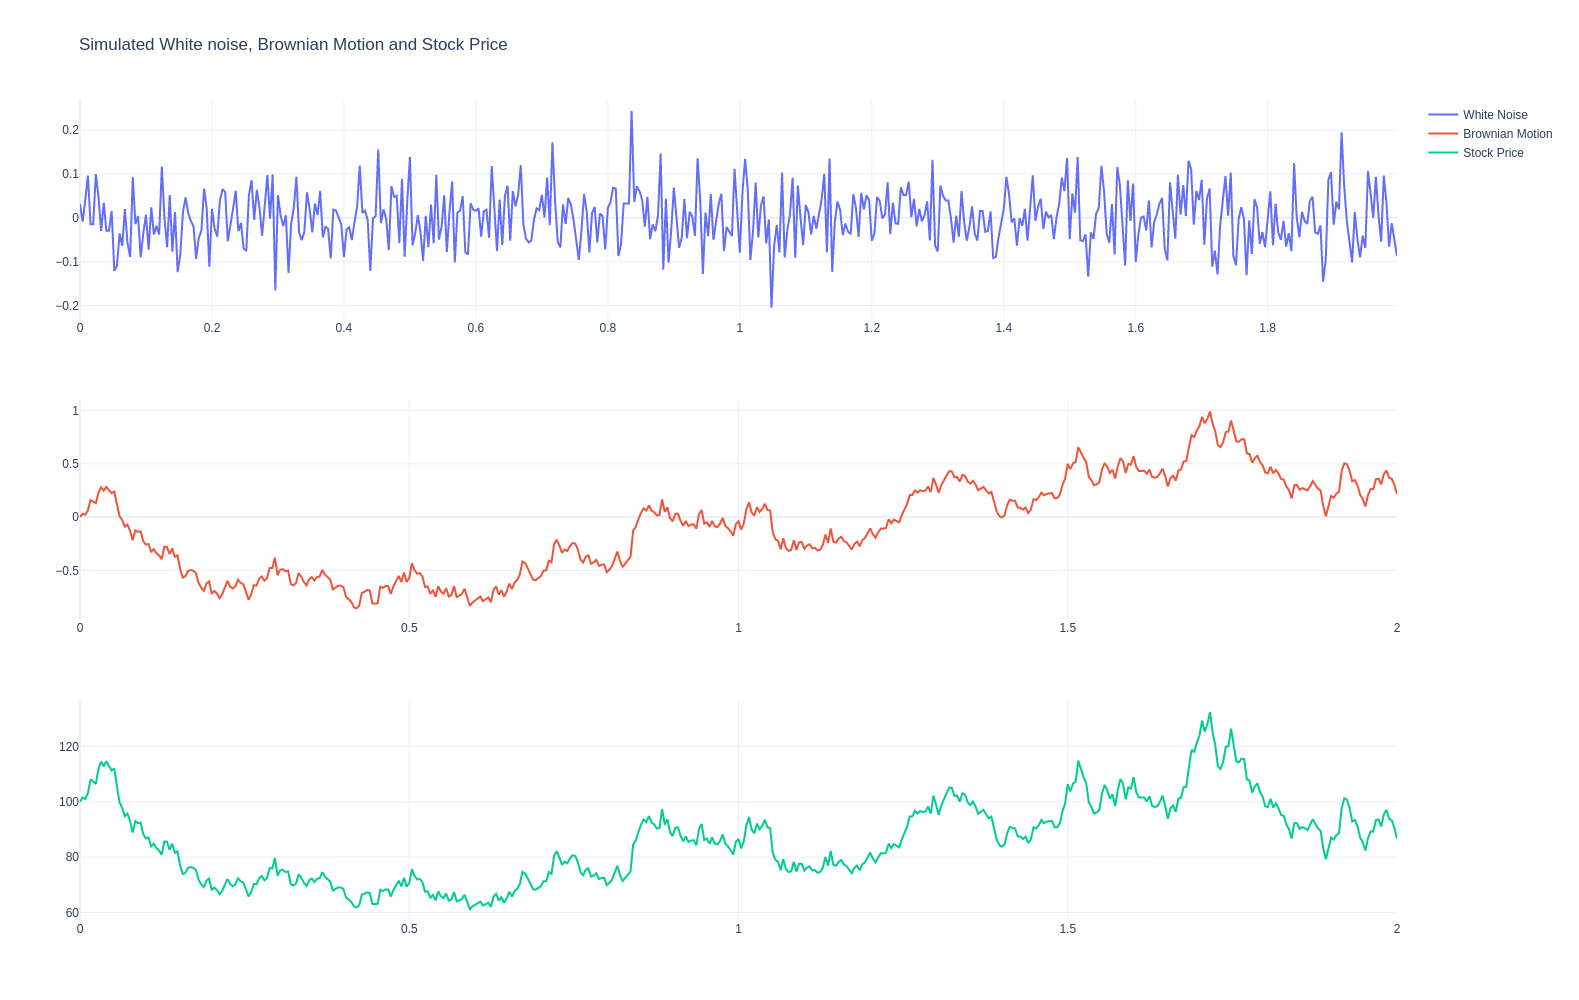

In [256]:
bss = BrownianStockSimulator(
    time_horizon=time_horizon,
    steps_count=steps_count,
    sigma=sigma
)
bss.simulate(init_stock_price=init_stock_price)
bss.plot()

## 4(b)
Write a function that computes the price of a European call option with a payoff $(X)_Y(T) − K)_{+}$ units of $Y$ as a function of $X_Y(t), K, t, T, \sigma$. This corresponds to the Black-Scholes formula. Write a function that computes $ \Delta^X(t)$, the hedging position for the option. Construct a hedging portfolio for this option using the data from a simulated path in part (a). Plot the corresponding evolution of the European call option and its hedging portfolio in one graph. Plot the hedging position $\Delta^X(t)$ in a separate graph. Simulate Brownian motion evolution and the stock price evolution that follows stochastic differential equation $dX_Y(t)=\sigma X_Y(t)dW_Y(t)$ Make plots of the Brownian increments, the corresponding Brownian motion and the resulting stock price.

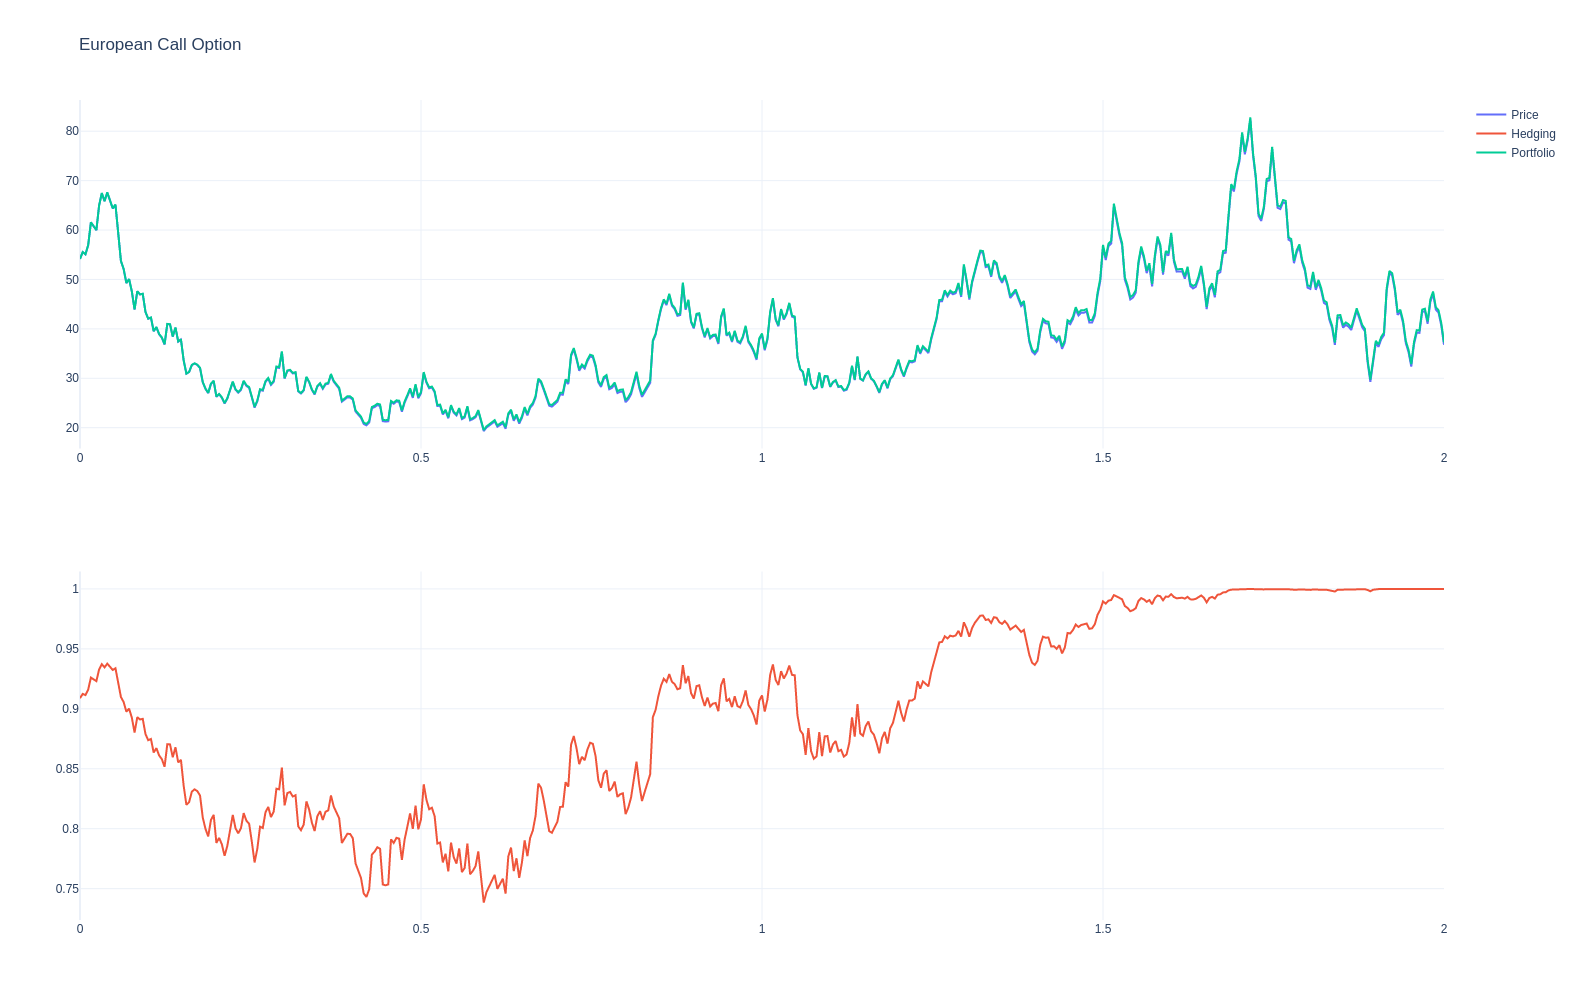

In [260]:
eu_call = EuropeanCallOption(
    strike_price=strike_price,
    end_time=time_horizon,
    steps_count=steps_count,
    sigma=sigma
)
eu_call.simulate(bss.price);
eu_call.plot();

## 4(c)
Modify your code from part (b) to allow for a continuous dividend yield in the stock $S$ (represented by an asset $X$) and a continuous interest rate $r$ (represented by an asset $Y$ ). Price the European stock option with a payoff $(S_{\$} (T) − K)_{+}$. Get 2019 data for SP500 (from 2019-01-01 to 2019-12-31), choose $K = S_{\$}(\text{2019-01-01})$  as the strike and plot the evolution of this European call option together with its hedging portfolio. Use σ as estimated from SP500 2018 values.

In [261]:
start_date_vol_estimate = np.datetime64("2018-01-02")
end_date_vol_estimate = np.datetime64("2019-01-01")
start_date_simulation = np.datetime64("2019-01-02")
end_date_simulation = np.datetime64("2020-01-01")

In [262]:
sp_500_vol_estimate = sp_500.history(
    start = start_date_vol_estimate, 
    end = end_date_vol_estimate,
    interval="1d"
)["Close"]

In [263]:
sp_500_simulation = sp_500.history(
    start = start_date_simulation, 
    end = end_date_simulation,
    interval="1d"
)["Close"]

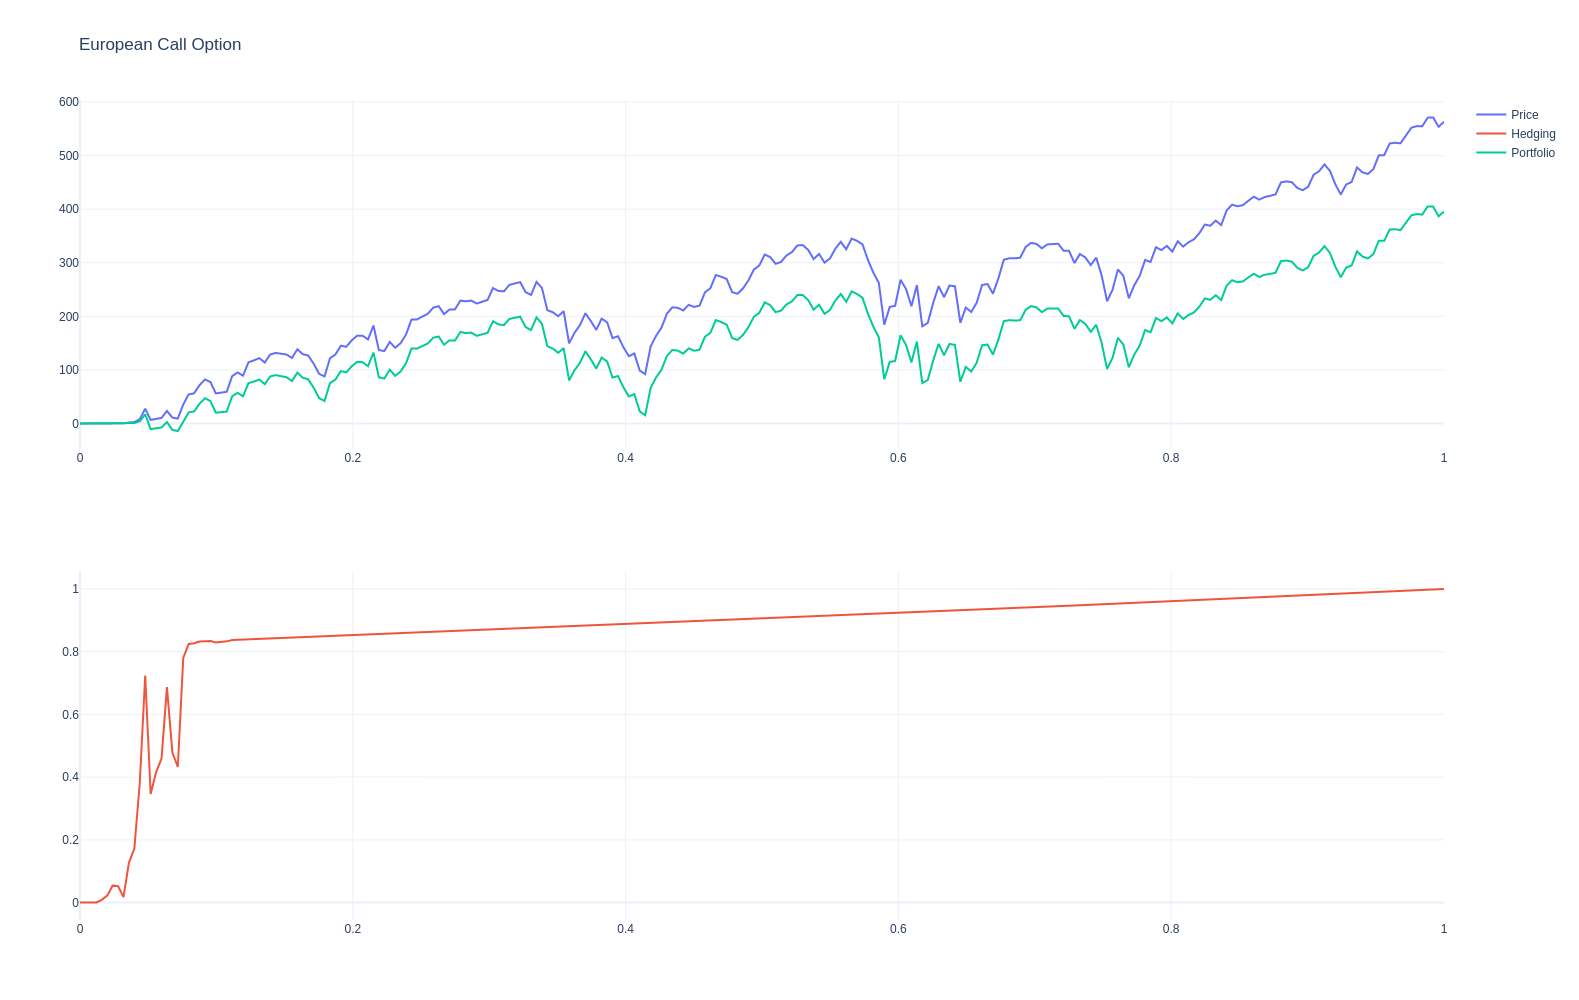

In [264]:
eu_call = EuropeanCallOption(
    strike_price=sp_500_simulation[0],
    end_time=1,
    steps_count=251,
    sigma=np.std(np.diff(np.log(sp_500_vol_estimate.values))),
    delta = 0.2,
    interest = 0.15
)
eu_call.simulate(sp_500_simulation)

eu_call.plot()